In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "C:/Users/OI/Desktop/data/mouse_drug_data.csv"
clinical_trial_data_to_load = "C:/Users/OI/Desktop/data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(clinical_data_df, mouse_data_df, on="Mouse ID")

# Display the data table for preview

combined_df.head(3)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combined_tum_drg = combined_df.groupby(['Drug', 'Timepoint'])
# combined_df.groupby(['Drug','Timepoint']).mean()
# Convert to DataFrame
tum_drg_df = combined_tum_drg.mean()
# Preview DataFrame
tum_drg_df = tum_drg_df[["Tumor Volume (mm3)"]]

tum_drg_df.head(2)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tum_sem = combined_tum_drg.sem()
# Convert to DataFrame
tum_sem.head()
# Preview DataFrame
tum_sem = tum_sem[["Tumor Volume (mm3)"]]
tum_sem.head(2)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593

In [4]:
# Minor Data Munging to Re-Format the TUMOR STANDARD ERROR Data Frames
tum_sem_piviot = tum_sem.pivot_table('Tumor Volume (mm3)',['Timepoint'], 'Drug')
# Preview that Reformatting worked
tum_sem_piviot.head(1)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tum_drg_df_piviot = tum_drg_df.pivot_table('Tumor Volume (mm3)',['Timepoint'], 'Drug')
# Preview that Reformatting worked
tum_drg_df_piviot.head(1)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0


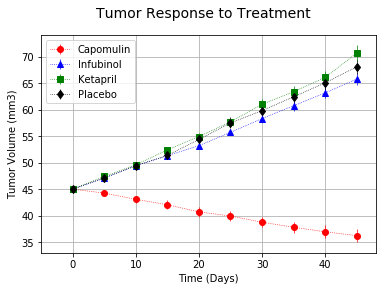

In [6]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 5)

fig, ax = plt.subplots()

fig.suptitle("Tumor Response to Treatment", fontsize=14 )

ax.set_xlim(-5, 48)
ax.set_ylim(33, 74)

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

ax.errorbar(x_axis, tum_drg_df_piviot.Capomulin.values, yerr=tum_sem_piviot.Capomulin.values, linestyle=':', linewidth=0.7, marker='o', color="r", label="Capomulin")
ax.errorbar(x_axis, tum_drg_df_piviot.Infubinol.values, yerr=tum_sem_piviot.Infubinol.values, linestyle=':', linewidth=0.7, marker='^', color="b", label="Infubinol")
ax.errorbar(x_axis, tum_drg_df_piviot.Ketapril.values, yerr=tum_sem_piviot.Ketapril.values, linestyle=':', linewidth=0.7, marker='s', color="g", label="Ketapril")
ax.errorbar(x_axis, tum_drg_df_piviot.Placebo.values, yerr=tum_sem_piviot.Placebo.values, linestyle=':', linewidth=0.7, marker='d', color="k",  label="Placebo")

plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("C:/Users/OI/Desktop/tum_resp.png")
#print figure
plt.show()


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined_met_drg = combined_df.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
met_drg_df = combined_met_drg.mean()
# Preview DataFrame
met_drg_df = met_drg_df[["Metastatic Sites"]]

met_drg_df.head(2)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                      0.00
          5                      0.16

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sem = combined_met_drg.sem()
# Convert to DataFrame
met_sem = met_sem[["Metastatic Sites"]]
# Preview DataFrame
met_sem.head(2)


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833

In [9]:
# Minor Data Munging to Re-Format the METASTATIC STANDARD ERROR Data Frames
met_sem_piviot = met_sem.pivot_table("Metastatic Sites",['Timepoint'], 'Drug')
# Preview that Reformatting worked
met_sem_piviot.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.0981,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709


In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_drg_df_piviot = met_drg_df.pivot_table("Metastatic Sites",['Timepoint'], 'Drug')
# Preview that Reformatting worked
met_drg_df_piviot.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.000000,0.00,0.000000,0.00000,0.000,0.00,0.00,0.00,0.000000
5,0.16,0.380952,0.28,0.304348,0.26087,0.375,0.32,0.12,0.24,0.166667


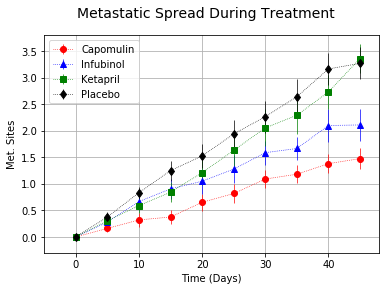

In [11]:
# Generate the Plot (with Error Bars)
x_axis = np.arange(0, 50, 5)

fig, bx = plt.subplots()

fig.suptitle("Metastatic Spread During Treatment", fontsize=14 )

bx.set_xlim(-5, 48)
bx.set_ylim(-0.3, 3.8)

bx.set_xlabel("Time (Days)")
bx.set_ylabel("Met. Sites")

bx.errorbar(x_axis, met_drg_df_piviot.Capomulin.values, yerr=met_sem_piviot.Capomulin.values, linestyle=':', linewidth=0.7, marker='o', color="r", label="Capomulin")
bx.errorbar(x_axis, met_drg_df_piviot.Infubinol.values, yerr=met_sem_piviot.Infubinol.values, linestyle=':', linewidth=0.7, marker='^', color="b", label="Infubinol")
bx.errorbar(x_axis, met_drg_df_piviot.Ketapril.values, yerr=met_sem_piviot.Ketapril.values, linestyle=':', linewidth=0.7, marker='s', color="g", label="Ketapril")
bx.errorbar(x_axis, met_drg_df_piviot.Placebo.values, yerr=met_sem_piviot.Placebo.values, linestyle=':', linewidth=0.7, marker='d', color="k",  label="Placebo")

plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("C:/Users/OI/Desktop/met_spread.png")
# #print figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count_grp = combined_df.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
mouse_count_df = mouse_count_grp.count()
# rename data frame
mouse_count_df = mouse_count_df[["Mouse ID"]]
mouse_count_df = mouse_count_df.rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
mouse_count_df.head(2)

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25

In [13]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_piviot = mouse_count_df.pivot_table("Mouse Count",['Timepoint'], 'Drug')
# Preview the Data Frame
mouse_count_piviot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [14]:
# Convert selected columns to percent survival


mouse_count_piviot['Capomulin'] = mouse_count_piviot['Capomulin'].apply(lambda x: ((x-25)/25*100) + 100)
mouse_count_piviot['Infubinol'] = mouse_count_piviot['Infubinol'].apply(lambda x: ((x-25)/25*100) + 100)
mouse_count_piviot['Ketapril'] = mouse_count_piviot['Ketapril'].apply(lambda x: ((x-25)/25*100) + 100)
mouse_count_piviot['Placebo'] = mouse_count_piviot['Placebo'].apply(lambda x: ((x-25)/25*100) + 100)

mouse_count_piviot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,25,100.0,100.0,25,100.0,26,25,26,25
5,100.0,21,100.0,92.0,23,96.0,25,25,25,24
10,100.0,20,84.0,88.0,21,96.0,23,24,23,22
15,96.0,19,84.0,76.0,21,80.0,17,24,23,21
20,92.0,18,80.0,76.0,20,76.0,17,23,21,17


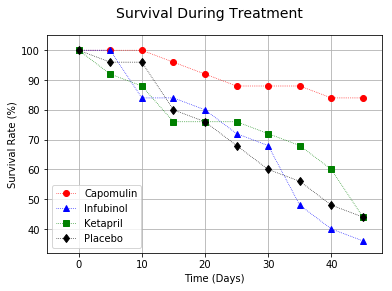

In [15]:
# Generate the Plot (Accounting for percentages)
x_axis = np.arange(0, 50, 5)

fig, cx = plt.subplots()

fig.suptitle("Survival During Treatment", fontsize=14 )

cx.set_xlim(-5, 48)
cx.set_ylim(32, 105)

cx.set_xlabel("Time (Days)")
cx.set_ylabel("Survival Rate (%)")

cx.plot(x_axis, mouse_count_piviot.Capomulin.values, linestyle=':', linewidth=0.7, marker='o', color="r", label="Capomulin")
cx.plot(x_axis, mouse_count_piviot.Infubinol.values, linestyle=':', linewidth=0.7, marker='^', color="b", label="Infubinol")
cx.plot(x_axis, mouse_count_piviot.Ketapril.values, linestyle=':', linewidth=0.7, marker='s', color="g", label="Ketapril")
cx.plot(x_axis, mouse_count_piviot.Placebo.values, linestyle=':', linewidth=0.7, marker='d', color="k",  label="Placebo")

plt.grid()
plt.legend(loc="best")

# # Save the Figure
plt.savefig("C:/Users/OI/Desktop/survival_pct.png")
# # #print figure
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
# (((y2- y1))/ y1) * 100
# Display the data to confirm
tum_drg_df_piviot.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [17]:
pct = []
names = list(tum_drg_df_piviot)

for i in names:

    init = tum_drg_df_piviot[i].iloc[0]
    end = tum_drg_df_piviot[i].iloc[-1]

    pct.append(((end-init)/init)*100)

#test list    
print(pct)
print(names)

[-19.475302667894155, 42.516491855897414, 46.12347172785184, 57.02879468660604, 53.923347134769195, 51.29796048315153, 47.24117486320634, -22.32090046276666, 52.085134287898995, 46.57975086509522]
['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


In [31]:
#create tuple from lists using 'zip' 
drug_pct_tup = list(zip(names, pct))
#test tuple
print(drug_pct_tup)

[('Capomulin', -19.475302667894155), ('Ceftamin', 42.516491855897414), ('Infubinol', 46.12347172785184), ('Ketapril', 57.02879468660604), ('Naftisol', 53.923347134769195), ('Placebo', 51.29796048315153), ('Propriva', 47.24117486320634), ('Ramicane', -22.32090046276666), ('Stelasyn', 52.085134287898995), ('Zoniferol', 46.57975086509522)]


In [58]:
#subset only parts of list i want for graph
ind = [0,2,3,5]

spec_pct = [pct[i] for i in ind]
spec_names = [names[i] for i in ind]

# spec_pct[pct[i] for i in [0,2,3,5]]
# # names(spec_names[i] for i in [0,2,3,5])
# test
print(spec_pct)
print(spec_names)

# convert to dataframe
bar_df = pd.DataFrame({'Drug': spec_names, 'Pct':spec_pct})

#mark negative values
bar_df['neg']=bar_df['Pct'] < 0

#test
bar_df

[-19.475302667894155, 46.12347172785184, 57.02879468660604, 51.29796048315153]
['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


,Drug,Pct,neg
0,Capomulin,-19.475303,True
1,Infubinol,46.123472,False
2,Ketapril,57.028795,False
3,Placebo,51.297960,False


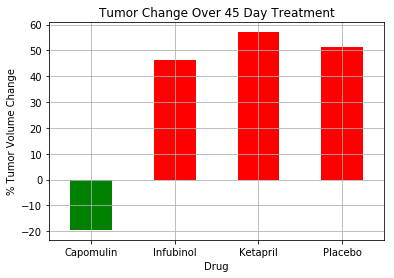

In [59]:
bar_df['Pct'].plot(kind='bar', color=bar_df.neg.map({True: 'g', False: 'r'}))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, spec_names, rotation='horizontal')
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.grid()


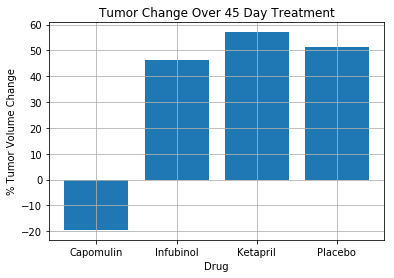

In [43]:
x_axis = np.arange(len(spec_pct))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, spec_names)

plt.bar(x_axis, spec_pct, align="center",)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.grid()

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

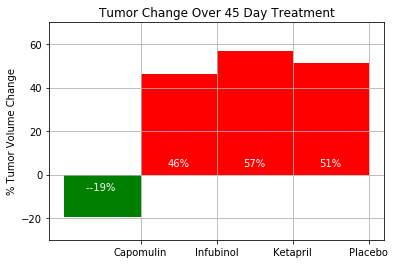